<a href="https://colab.research.google.com/github/probml/probml-notebooks/blob/main/notebooks/smc_ibis_1d.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SMC sequential inference for a static parameter (IBIS) for 1d Gaussian

The model is $p(y_t|y_{0:t-1},\theta)=N(y_t|\theta.\mu, \theta.\sigma^2)$.

Code is from 

https://github.com/nchopin/particles/blob/master/docs/source/notebooks/SMC_samplers_tutorial.ipynb





In [1]:
#!git clone https://github.com/nchopin/particles.git
!pip install git+https://github.com/nchopin/particles.git

  Cloning https://github.com/nchopin/particles.git to /tmp/pip-req-build-7v5t8u0p
  Running command git clone -q https://github.com/nchopin/particles.git /tmp/pip-req-build-7v5t8u0p
     |████████████████████████████████| 28.5 MB 1.2 MB/s 
  Created wheel for particles: filename=particles-0.2-py3-none-any.whl size=573163 sha256=a30e31598fbb79c754460bb72f617d9a086ff88e8748b72d39b81678c1e074ae
  Stored in directory: /tmp/pip-ephem-wheel-cache-xq2evopn/wheels/39/c8/56/75c7840e70bdc3dc78074b2e2bc3cfa3023fd0f6d1ff456e2e
Successfully built particles
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
import particles
import particles.state_space_models as ssm
import particles.distributions as dists

In [4]:

%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from scipy import stats

import particles
from particles import smc_samplers as ssp
from particles import distributions as dists

class ToyModel(ssp.StaticModel):
    def logpyt(self, theta, t):  # density of Y_t given theta and Y_{0:t-1}
        return stats.norm.logpdf(self.data[t], loc=theta['mu'],
                                 scale = theta['sigma'])
        
T = 30
my_data = stats.norm.rvs(loc=3.14, size=T)  # simulated data
my_prior = dists.StructDist({'mu': dists.Normal(scale=10.),
                             'sigma': dists.Gamma()})

my_static_model = ToyModel(data=my_data, prior=my_prior)

We run IBIS with 20 particles, using 50 MCMC iterations per time step (data point). We use "waste free" SMC, so we generate 50*20=1000 samples in total per step.

In [5]:
%%time

my_ibis = ssp.IBIS(my_static_model, len_chain=50)
my_alg = particles.SMC(fk=my_ibis, N=20, store_history=True, verbose=True)
my_alg.run()

t=0, ESS=78.17
t=1, Metropolis acc. rate (over 49 steps): 0.214, ESS=467.80
t=2, Metropolis acc. rate (over 49 steps): 0.161, ESS=711.16
t=3, ESS=293.44
t=4, Metropolis acc. rate (over 49 steps): 0.263, ESS=628.07
t=5, ESS=777.21
t=6, ESS=708.08
t=7, ESS=707.61
t=8, ESS=672.05
t=9, ESS=638.11
t=10, ESS=616.74
t=11, ESS=585.85
t=12, ESS=553.99
t=13, ESS=526.01
t=14, ESS=491.09
t=15, Metropolis acc. rate (over 49 steps): 0.349, ESS=919.21
t=16, ESS=715.77
t=17, ESS=695.42
t=18, ESS=693.24
t=19, ESS=652.13
t=20, ESS=814.48
t=21, ESS=773.12
t=22, ESS=692.89
t=23, ESS=623.20
t=24, ESS=586.51
t=25, ESS=514.51
t=26, ESS=482.00
t=27, Metropolis acc. rate (over 49 steps): 0.369, ESS=984.63
t=28, ESS=947.79
t=29, ESS=883.01
CPU times: user 565 ms, sys: 22.4 ms, total: 588 ms
Wall time: 623 ms


In [12]:
dir(my_alg)

['A',
 'ESSrmin',
 'N',
 'W',
 'X',
 'Xp',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'aux',
 'compute_summaries',
 'cpu_time',
 'fk',
 'generate_particles',
 'hist',
 'logLt',
 'log_mean_w',
 'loglt',
 'next',
 'qmc',
 'resample_move',
 'resample_move_qmc',
 'resampling',
 'reset_weights',
 'reweight_particles',
 'rs_flag',
 'run',
 'setup_auxiliary_weights',
 'summaries',
 't',
 'verbose',
 'wgts']

In [14]:
dir(my_alg.hist)

['A',
 'N',
 'T',
 'X',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_backward_sampling_ON',
 '_backward_sampling_ON2',
 '_check_h_orders',
 '_two_filter_smoothing_ON',
 '_two_filter_smoothing_ON2',
 'backward_sampling',
 'backward_sampling_qmc',
 'compute_trajectories',
 'extract_one_trajectory',
 'fk',
 'save',
 'two_filter_smoothing',
 'wgts']

In [19]:
xx = my_alg.hist.X[0].theta["mu"]
nsamples = xx.shape[0]
print(nsamples)

1000


(30, 1000)


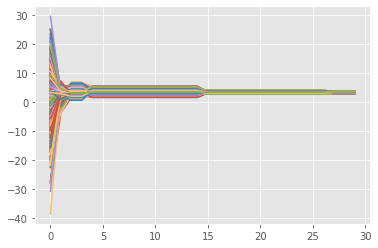

In [23]:
mus = np.zeros((T, nsamples))
times = np.arange(T)
for t in times:
    mus[t, :] = my_alg.hist.X[t].theta["mu"]

print(mus.shape)
plt.figure()
plt.plot(times, mus, label="mu");

Below we show the histogram of samples at two time steps for each parameter.
We see that the posterior concentrates on the true values.

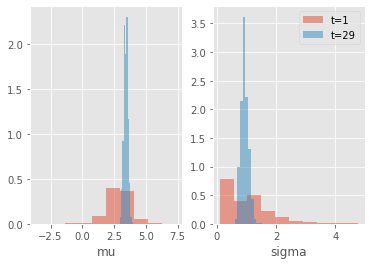

In [25]:
plt.style.use("ggplot")
for i, p in enumerate(["mu", "sigma"]):
    plt.subplot(1, 2, i + 1)
    for t in [1, 29]:
        plt.hist(my_alg.hist.X[t].theta[p], weights=my_alg.hist.wgts[t].W, label="t=%i" % t, alpha=0.5, density=True)
    plt.xlabel(p)
plt.legend()
plt.savefig("ibis-post-histo.png")
plt.savefig("ibis-post-histo.pdf")

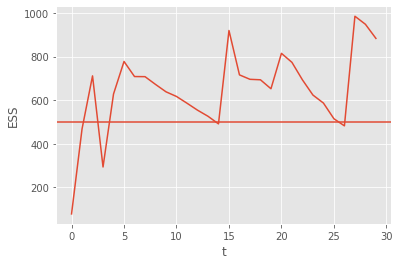

In [38]:
plt.plot(my_alg.summaries.ESSs)
plt.xlabel("t")
plt.ylabel("ESS")
plt.axhline(y=500)
plt.savefig("ibis-ESS-vs-time.png")
plt.savefig("ibis-ESS-vs-time.pdf")

In [30]:
print(my_alg.X.shared.keys())

dict_keys(['rs_flag', 'chol_cov', 'acc_rates'])


In [35]:
rates = my_alg.X.shared["acc_rates"]
print(len(rates))
for r in rates:
    print(np.mean(r))

5
0.21405374788813664
0.16100694015115935
0.26278967432180883
0.3486559129773304
0.36904453629065304
